In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
#Read Data from adult.data file

columns = ['Age', 'WorkClass', 'FNLWGT', 'Education', 'EducationNum',
           'MaritalStatus','Occupation','Relationship','Race','Sex', 
           'CapitalGain','CapitalLoss','HoursPerWeek','NativeCountry', 'Income']

train_data = pd.read_csv('Dataset/adult.data', sep=', ', names=columns, engine='python')
test_data = pd.read_csv('Dataset/adult.test', sep=', ', names=columns, engine='python')

In [3]:
def clean_data (dataset) :
    
    #Remove the rows having '?'
    dataset = dataset[~(dataset[columns] == '?').any(axis=1)]
    
    #Remove rows having 'NaN'
    dataset = dataset.dropna()
    
    #Reset index
    dataset = dataset.reset_index(drop=True)
    
    # Replace '>50K.' with '>50K' and '<=50K.' with '<=50K' 
    dataset = dataset.replace('>50K.', '>50K')
    dataset = dataset.replace('<=50K.', '<=50K')
    
    return dataset

In [4]:
def concatDataframe (dataset1, dataset2):
    return pd.concat([dataset1, dataset2], ignore_index=True)

In [5]:
def col_vs_income(labels, less_than_fifty, greater_than_fifty, title, xlabel, ylabel):

    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(figsize=(15, 8))
    rects1 = ax.bar(x - width/2, less_than_fifty, width, label='<=50K')
    rects2 = ax.bar(x + width/2, greater_than_fifty, width, label='>50K')

    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    plt.xticks(rotation=90)


    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}%'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 5),  # 5 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')


    autolabel(rects1)
    autolabel(rects2)

    fig.tight_layout()

    plt.show()

In [6]:
def get_count_df_normalized(concatenate_dataset, colname):
    col_income = concatenate_dataset.groupby([colname,'Income']).size().unstack(level=0).T
    #Normalize data
    col_income['Total'] = col_income['<=50K'] + col_income['>50K']
    col_income['<=50K%'] = round((col_income['<=50K'] / col_income['Total']) * 100)
    col_income['>50K%'] = round((col_income['>50K'] / col_income['Total']) * 100)
    col_income[colname] = col_income.T.columns

    #Put data in a new data frame
    dict = {colname:col_income.T.columns.tolist(),
            '<=50K': col_income['<=50K%'].tolist(),
            '>50K':col_income['>50K%'].tolist()}
    col_income_dict = pd.DataFrame(dict)
    
    return col_income_dict

In [7]:
def get_count_df_absolute(concatenate_dataset, colname):
    col_income = concatenate_dataset.groupby([colname,'Income']).size().unstack(level=0).T
    col_income[colname] = col_income.T.columns
    #Put data in a new data frame
    dict = {colname:col_income.T.columns.tolist(),
            '<=50K': col_income['<=50K'].tolist(),
            '>50K':col_income['>50K'].tolist()}
    col_income_dict = pd.DataFrame(dict)
    
    return col_income_dict

In [8]:
def plot_bar_chart(colname, title, xlabel, ylabel):
    col_income_dict = get_count_df_normalized(concatenate_dataset, colname)
    #Plot the comparision between WorkClass and Income
    col_vs_income(col_income_dict[colname].tolist(), col_income_dict['<=50K'].tolist(), col_income_dict['>50K'].tolist(), title, xlabel, ylabel)

In [9]:
def plot_box_plot(colname, title, xlabel, ylabel):
    con_data = get_count_df_absolute(concatenate_dataset, colname)
    labels = con_data[colname].tolist()
    fig, ax = plt.subplots(figsize=(15, 8))
    x = np.arange(len(labels))
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    plt.xticks(rotation=90)
    sns.boxplot(ax=ax, data = con_data)

In [10]:
train_data = clean_data(train_data)
test_data = clean_data(test_data)
concatenate_dataset = concatDataframe(train_data, test_data)

In [11]:
concatenate_dataset

,Age,WorkClass,FNLWGT,Education,EducationNum,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Income
0,39,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,33,Private,245211.0,Bachelors,13.0,Never-married,Prof-specialty,Own-child,White,Male,0.0,0.0,40.0,United-States,<=50K
45218,39,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K
45219,38,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
45220,44,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K


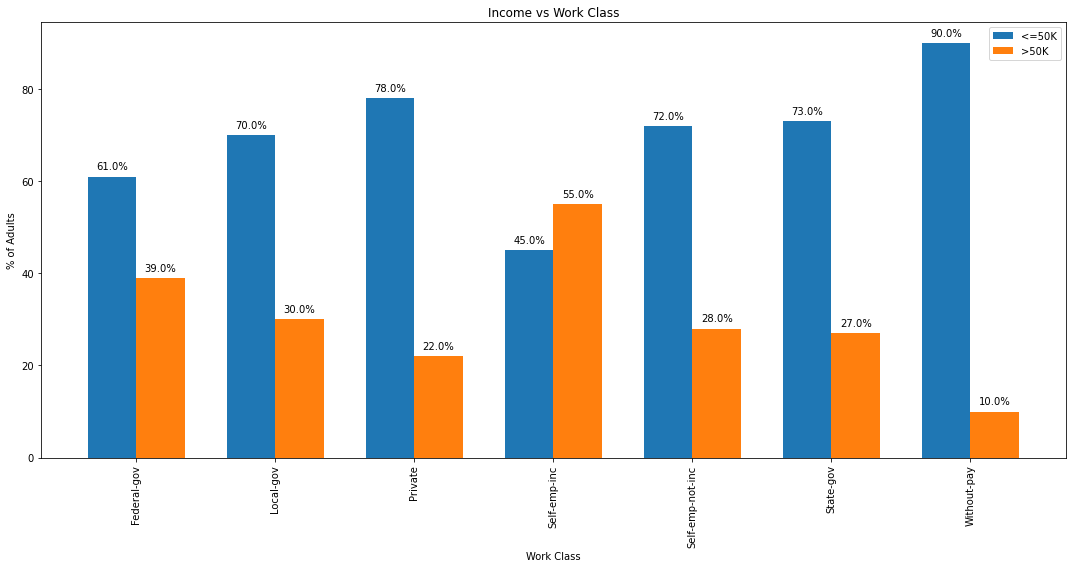

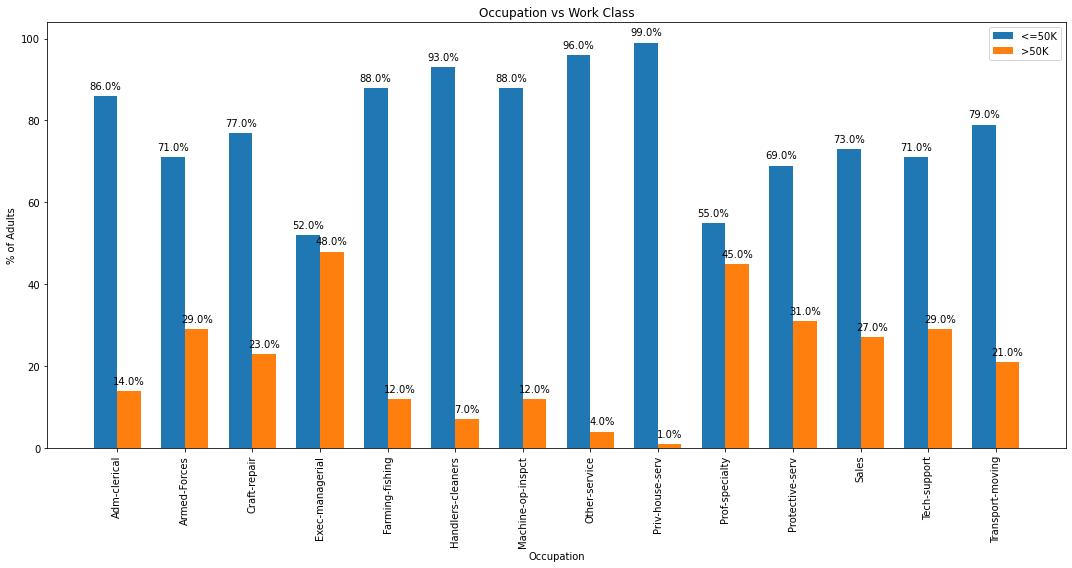

No handles with labels found to put in legend.
No handles with labels found to put in legend.


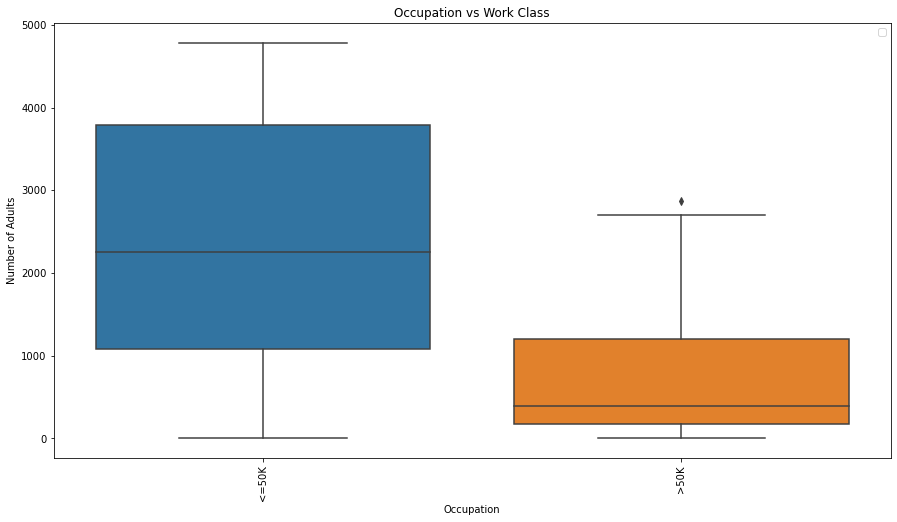

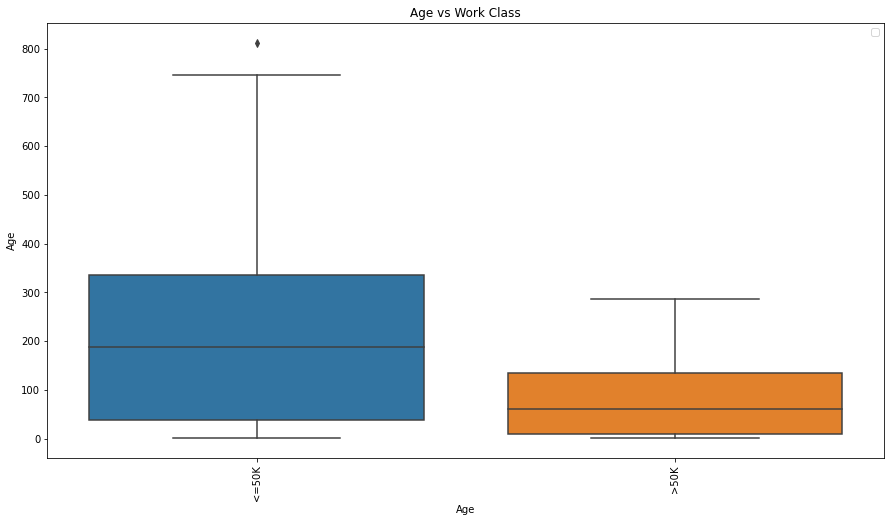

In [14]:
#plot_bar_chart( colname, chart_title, x_label, y_label)
plot_bar_chart('WorkClass', 'Income vs Work Class', 'Work Class', '% of Adults')
plot_bar_chart('Occupation', 'Occupation vs Work Class', 'Occupation', '% of Adults')
plot_box_plot('Occupation', 'Occupation vs Work Class', 'Occupation', 'Number of Adults')
plot_box_plot('Age', 'Age vs Work Class', 'Age', 'Age')